## Importing packages.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

## Reading files in a folder.

In [2]:
files = [file for file in os.listdir('./DATA/')]

for file in files :
    print(file)

wfp_food_prices_ind.csv


## Reading `CSV` file.

In [3]:
foodPrices = pd.read_csv("./DATA/wfp_food_prices_ind.csv")

In [4]:
foodPrices.head(10)

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,Retail,INR,8.0,0.2545
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,actual,Retail,INR,5.0,0.159
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4294
4,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.0,0.986
5,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,Retail,INR,6.8,0.2163
6,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Wheat,KG,actual,Retail,INR,6.2,0.1972
7,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4294
8,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,oil and fats,Oil (mustard),KG,actual,Retail,INR,30.0,0.9542
9,1994-01-15,Himachal Pradesh,Shimla,Shimla,31.103333,77.172222,cereals and tubers,Rice,KG,actual,Retail,INR,9.0,0.2863


In [5]:
foodPrices.rename(columns = {'admin1':'State'}, inplace = True)

## Droping first row from the dataframe.

In [6]:
foodPrices = foodPrices.drop(index=0)
foodPrices.head()

,date,State,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,Retail,INR,8.0,0.2545
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,actual,Retail,INR,5.0,0.159
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4294
4,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.0,0.986
5,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,Retail,INR,6.8,0.2163


## Droping 2 columns.

In [7]:
foodPrices = foodPrices.drop(['admin2','priceflag'], axis=1)

In [8]:
foodPrices.head()

,date,State,market,latitude,longitude,category,commodity,unit,pricetype,currency,price,usdprice
1,1994-01-15,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,Retail,INR,8.0,0.2545
2,1994-01-15,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,Retail,INR,5.0,0.159
3,1994-01-15,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,Retail,INR,13.5,0.4294
4,1994-01-15,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,Retail,INR,31.0,0.986
5,1994-01-15,Gujarat,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,Retail,INR,6.8,0.2163


In [9]:
foodPrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172017 entries, 1 to 172017
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       172017 non-null  object
 1   State      171228 non-null  object
 2   market     172017 non-null  object
 3   latitude   171228 non-null  object
 4   longitude  171228 non-null  object
 5   category   172017 non-null  object
 6   commodity  172017 non-null  object
 7   unit       172017 non-null  object
 8   pricetype  172017 non-null  object
 9   currency   172017 non-null  object
 10  price      172017 non-null  object
 11  usdprice   172017 non-null  object
dtypes: object(12)
memory usage: 15.7+ MB


## Changing data types of the columns.

In [10]:
foodPrices['date'] = pd.to_datetime(foodPrices['date'])
foodPrices[['price','usdprice']] = foodPrices[['price','usdprice']].astype(float)
foodPrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172017 entries, 1 to 172017
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date       172017 non-null  datetime64[ns]
 1   State      171228 non-null  object        
 2   market     172017 non-null  object        
 3   latitude   171228 non-null  object        
 4   longitude  171228 non-null  object        
 5   category   172017 non-null  object        
 6   commodity  172017 non-null  object        
 7   unit       172017 non-null  object        
 8   pricetype  172017 non-null  object        
 9   currency   172017 non-null  object        
 10  price      172017 non-null  float64       
 11  usdprice   172017 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 15.7+ MB


## Extracting `Year` and `Month` to new columns from `date` column.

In [11]:
foodPrices['Month'] = foodPrices['date'].dt.month
foodPrices['Year'] = foodPrices['date'].dt.year

foodPrices.head()

,date,State,market,latitude,longitude,category,commodity,unit,pricetype,currency,price,usdprice,Month,Year
1,1994-01-15,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,Retail,INR,8.0,0.2545,1,1994
2,1994-01-15,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,Retail,INR,5.0,0.1590,1,1994
3,1994-01-15,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,Retail,INR,13.5,0.4294,1,1994
4,1994-01-15,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,Retail,INR,31.0,0.9860,1,1994
5,1994-01-15,Gujarat,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,Retail,INR,6.8,0.2163,1,1994


### Observe, Is dataset containes all the months data in all the years

In [12]:
foodPrices.groupby('Year')['Month'].unique()

Year
1994    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
1995    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
1996    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
1997    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
1998    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
1999    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2000    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2001    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2002    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2003    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2004    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2005    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2006    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2007    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2008    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2009    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2010    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2011    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2012    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2013    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2014    [1, 2, 3, 4, 5, 6, 7, 8, 9,

- **`2022` year dosn't contain all the months data because this notebook(code) is written in `Nov. 2022`**
<br><br>
- **`Here 2022 data will be dropped`**

In [13]:
foodPrices = foodPrices[(foodPrices['Year'] != 2022)]

In [14]:
foodPrices.groupby('Year')['Month'].unique()

Year
1994    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
1995    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
1996    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
1997    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
1998    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
1999    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2000    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2001    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2002    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2003    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2004    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2005    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2006    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2007    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2008    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2009    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2010    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2011    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2012    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2013    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2014    [1, 2, 3, 4, 5, 6, 7, 8, 9,

## `Catergories` present in the data frames

In [15]:
print(pd.unique(foodPrices.category))

['cereals and tubers' 'miscellaneous food' 'oil and fats'
 'pulses and nuts' 'vegetables and fruits' 'milk and dairy']


In [16]:
Categories = pd.unique(foodPrices.category)

## Iterating through `categories` array and retriving `commodities` respectively

In [17]:
for category in Categories :
    print(pd.unique(foodPrices[foodPrices['category'] == category ]['commodity']))

['Rice' 'Wheat' 'Potatoes' 'Wheat flour']
['Sugar' 'Salt (iodised)' 'Tea (black)' 'Sugar (jaggery/gur)']
['Oil (mustard)' 'Oil (groundnut)' 'Oil (palm)' 'Oil (sunflower)'
 'Ghee (vanaspati)' 'Oil (soybean)']
['Chickpeas' 'Lentils (masur)' 'Lentils' 'Lentils (moong)'
 'Lentils (urad)']
['Onions' 'Tomatoes']
['Milk' 'Milk (pasteurized)']


## Creating `commodities` list and adding `commodities` to it respective to `categories`.

In [18]:
commodities = []
for category in Categories :
    commodities.append(pd.unique(foodPrices[foodPrices['category'] == category ]['commodity']))

- **Observing first 50 records.**

In [19]:
foodPrices.groupby(['Year','commodity'])['price'].mean().head(50)

Year  commodity    
1994  Oil (mustard)     35.792517
      Rice               7.954800
      Sugar             14.340127
      Wheat              6.021053
1995  Rice               8.151724
      Wheat              5.789535
1996  Oil (mustard)     39.638191
      Rice               9.111022
      Sugar             14.669484
      Wheat              7.396429
1997  Rice               9.670681
      Wheat              8.337975
1998  Rice              10.218508
      Wheat              8.320890
1999  Rice              11.307353
      Wheat              8.404911
2000  Chickpeas         20.160652
      Oil (mustard)     42.741111
      Onions             5.855435
      Potatoes           5.157174
      Rice             212.822780
      Sugar             16.670429
      Wheat            214.229651
2001  Chickpeas         25.128125
      Oil (mustard)     43.153205
      Onions             7.283542
      Potatoes           6.978542
      Rice             314.593425
      Sugar             16.2

## Average commodity price over `1994 - 2022` for 1 category

In [20]:
foodPrices[foodPrices['category'] == Categories[0]].groupby('Year')['price'].mean()

Year
1994      7.032427
1995      6.977457
1996      8.334412
1997      9.067335
1998      9.371254
1999     10.154610
2000    191.710227
2001    258.492462
2002    179.810251
2003    177.407378
2004    184.817988
2005    195.306490
2006    230.111933
2007    244.256955
2008    281.079361
2009    296.472480
2010    314.349236
2011    168.271877
2012    118.980525
2013    116.773788
2014    117.458240
2015    104.999890
2016    104.301361
2017    111.831242
2018    125.939768
2019    168.470395
2020    102.950820
2021     29.122926
Name: price, dtype: float64

## Plotting AVG. price change of all the categories over `1994 - 2022`

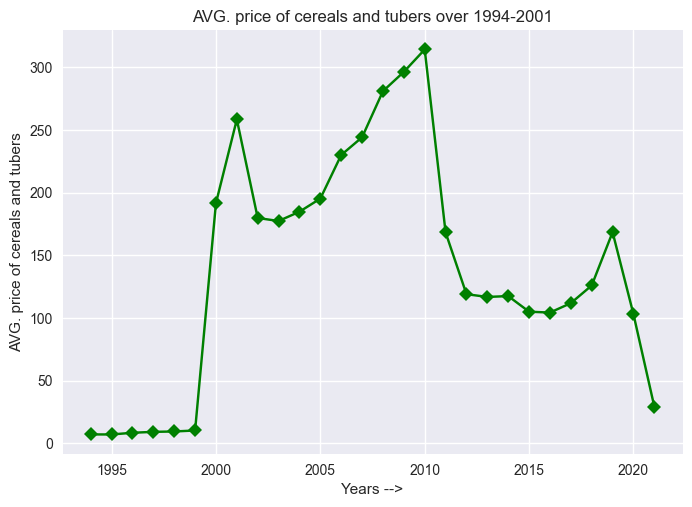

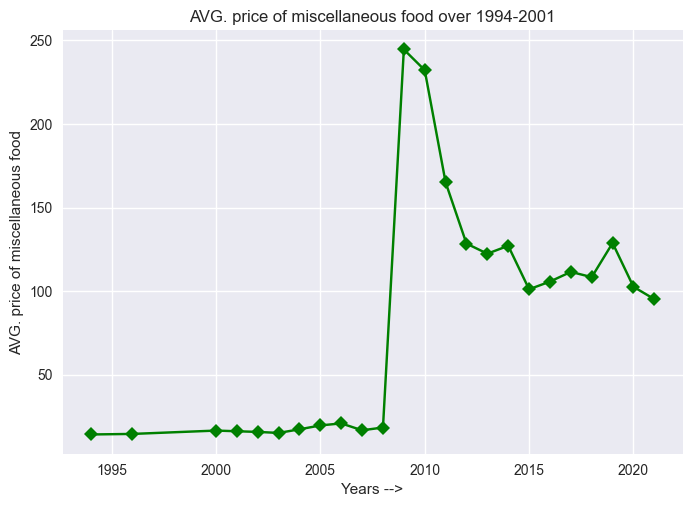

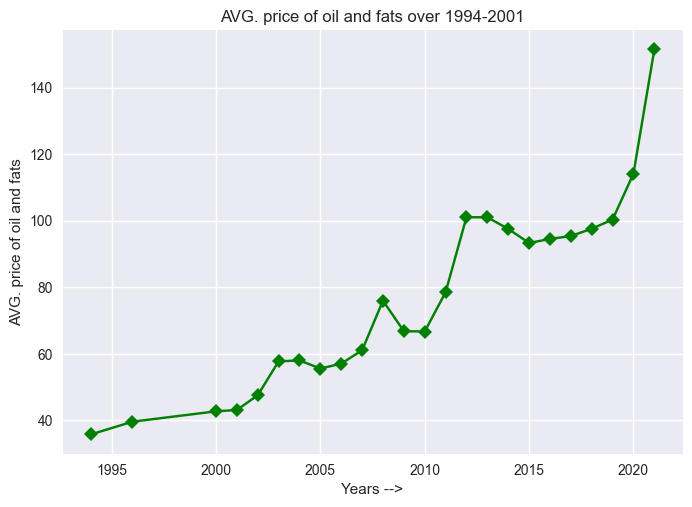

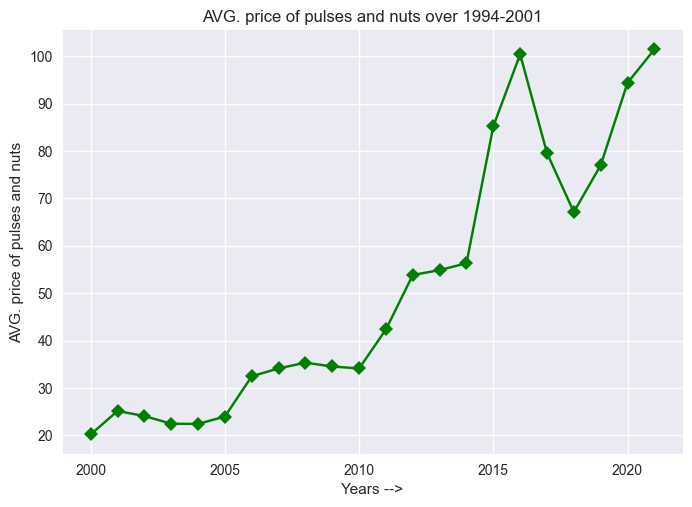

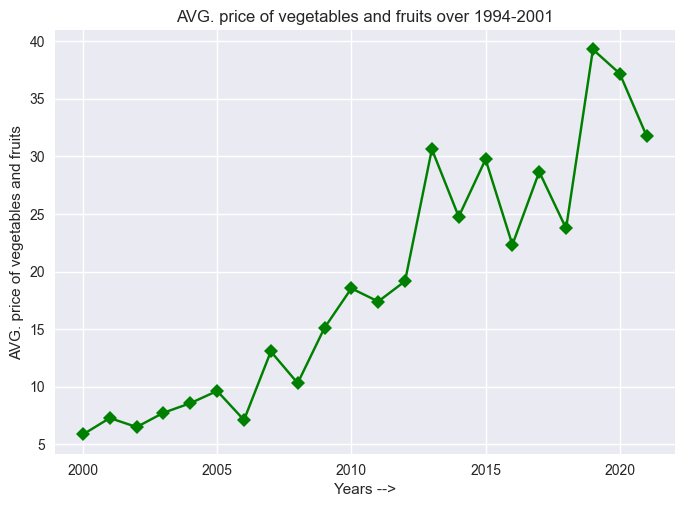

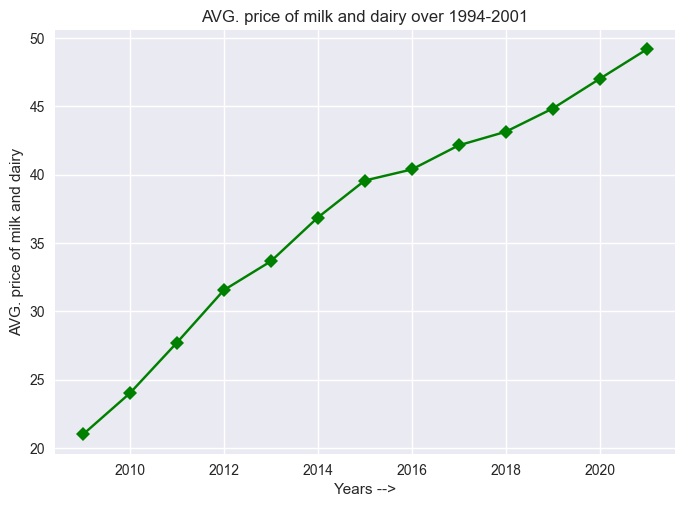

In [21]:
for category in Categories:
    plt.style.use('seaborn')
    plt.plot(foodPrices[foodPrices['category'] == category].groupby('Year')['price'].mean().index,foodPrices[foodPrices['category'] == category].groupby('Year')['price'].mean(), 'gD', linestyle='solid')
    plt.xlabel('Years -->')
    plt.ylabel('AVG. price of ' + category)
    plt.title('AVG. price of ' + category + ' over 1994-2001')
    plt.show()

### Lets invistigate only 2 commodities from the Dataset

- **`Rice` and `Wheat` are considered for investigation. Because these commodities appear in all most every year**

In [22]:
Rice_WheatDataSet = foodPrices[(foodPrices['commodity'] == 'Rice') | (foodPrices['commodity'] == 'Wheat')][['commodity','price','Year']]

In [23]:
Rice_WheatDataSet[Rice_WheatDataSet['commodity'] == 'Rice'].groupby('Year')['price'].mean()

Year
1994      7.954800
1995      8.151724
1996      9.111022
1997      9.670681
1998     10.218508
1999     11.307353
2000    212.822780
2001    314.593425
2002    195.524335
2003    193.354346
2004    201.853083
2005    214.027708
2006    230.515560
2007    242.498958
2008    298.598708
2009    312.555217
2010    386.803047
2011    199.037872
2012    210.234831
2013    229.055948
2014    227.759165
2015    194.045037
2016    194.899704
2017    222.130699
2018    248.424567
2019    332.116397
2020    194.379099
2021     36.318811
Name: price, dtype: float64

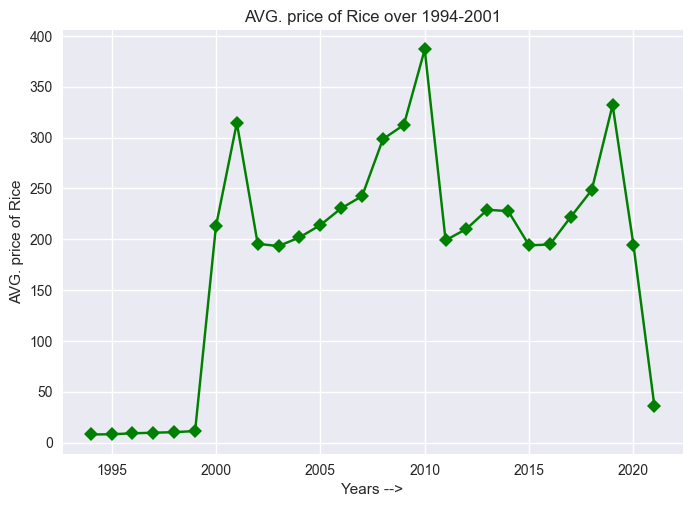

In [24]:
plt.style.use('seaborn')
plt.plot(Rice_WheatDataSet[Rice_WheatDataSet['commodity'] == 'Rice'].groupby('Year')['price'].mean().index,Rice_WheatDataSet[Rice_WheatDataSet['commodity'] == 'Rice'].groupby('Year')['price'].mean(), 'gD', linestyle='solid')
plt.xlabel('Years -->')
plt.ylabel('AVG. price of Rice')
plt.title('AVG. price of Rice over 1994-2001')
plt.show()

In [25]:
Rice_WheatDataSet[Rice_WheatDataSet['commodity'] == 'Wheat'].groupby('Year')['price'].mean()

Year
1994      6.021053
1995      5.789535
1996      7.396429
1997      8.337975
1998      8.320890
1999      8.404911
2000    214.229651
2001    288.125496
2002    203.107005
2003    198.860870
2004    206.464559
2005    217.518564
2006    284.724219
2007    303.008081
2008    326.070000
2009    344.165377
2010    371.205288
2011    165.693796
2012    173.663056
2013    205.512364
2014    200.563664
2015    170.438657
2016    181.833782
2017    188.508777
2018    213.295221
2019    279.616681
2020    155.615870
2021     27.542394
Name: price, dtype: float64

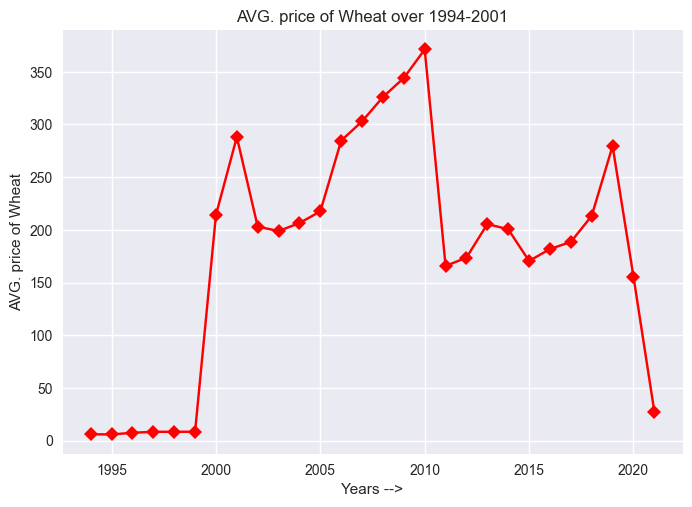

In [26]:
plt.style.use('seaborn')
plt.plot(Rice_WheatDataSet[Rice_WheatDataSet['commodity'] == 'Wheat'].groupby('Year')['price'].mean().index,Rice_WheatDataSet[Rice_WheatDataSet['commodity'] == 'Wheat'].groupby('Year')['price'].mean(), 'rD', linestyle='solid')
plt.xlabel('Years -->')
plt.ylabel('AVG. price of Wheat')
plt.title('AVG. price of Wheat over 1994-2001')
plt.show()

### No. Markets present in Different States

In [27]:
foodPrices.groupby('State')['market'].nunique()

State
Andaman and Nicobar     2
Andhra Pradesh          4
Assam                   1
Bihar                  17
Chandigarh              1
Chhattisgarh            5
Delhi                   1
Goa                     1
Gujarat                 8
Haryana                 4
Himachal Pradesh        7
Jharkhand               8
Karnataka              12
Kerala                  7
Madhya Pradesh         11
Maharashtra             6
Manipur                 1
Meghalaya               3
Mizoram                 1
Nagaland                2
Orissa                  9
Puducherry              1
Punjab                  3
Rajasthan               7
Sikkim                  1
Tamil Nadu              9
Telangana               6
Tripura                 1
Uttar Pradesh          14
Uttarakhand             4
West Bengal             7
Name: market, dtype: int64

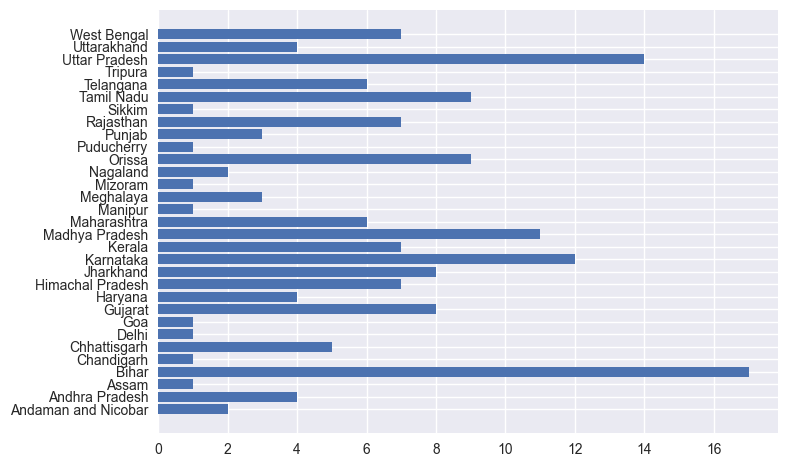

In [28]:
plt.barh(foodPrices.groupby('State')['market'].nunique().index,foodPrices.groupby('State')['market'].nunique())
plt.show()